In [14]:
from Insurance_Data_Loading import ins
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [15]:
from Insurance_Data_Loading import ins
import pandas as pd


print(ins.info())
print(ins.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [16]:
print(ins.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [17]:
# Display value counts for categorical variables
print(ins['region'].value_counts().sort_values(ascending=False))

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [18]:
# Correlation matrix
data_tf = {'sex': {'male': 0, 'female': 1},
           'smoker': {'no': 0, 'yes': 1},
           'region': {'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3}}
ins_en = ins.copy()
ins_en.replace(data_tf, inplace=True)
print(ins_en.corr().style.background_gradient(cmap='Blues'))

In [19]:
# Correlation matrix to understand relationships between features
data_tf = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }

ins_en = ins.copy()
ins_en.replace(data_tf, inplace=True)
ins_en.corr().style.background_gradient(cmap='Blues')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


<Figure size 1080x576 with 0 Axes>

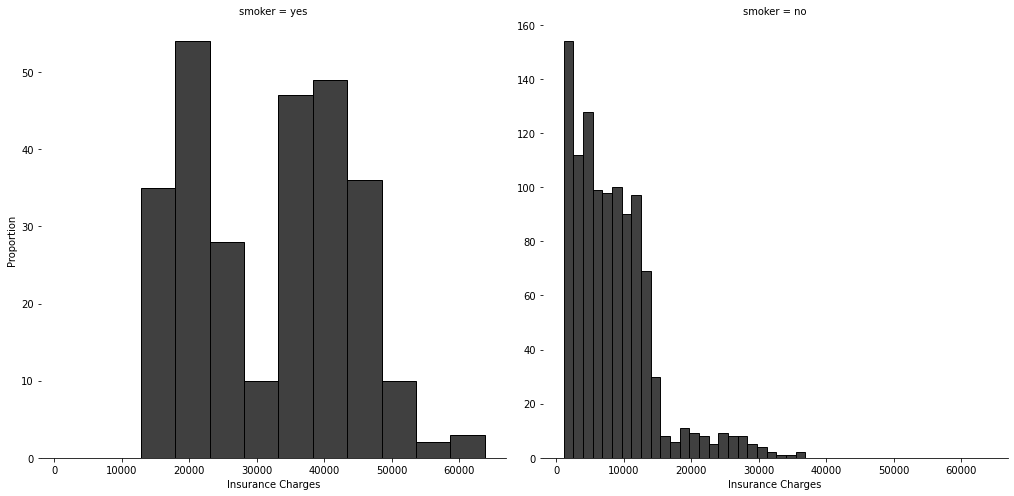

<Figure size 1080x576 with 0 Axes>

In [20]:
# Visualize distributions and relationships
sns.FacetGrid(ins, col="smoker", height=7, sharey=False, sharex=True).map(sns.histplot, "charges", color='black').set_axis_labels("Insurance Charges", "Proportion").despine(left=True)
plt.figure(figsize=(15, 8))

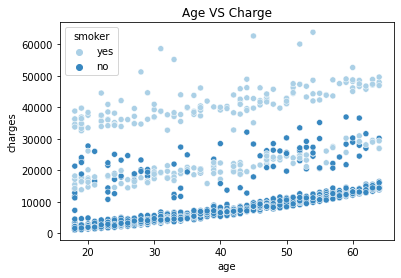

In [21]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=ins, palette='Blues')
plt.title('Age VS Charge')
plt.show()

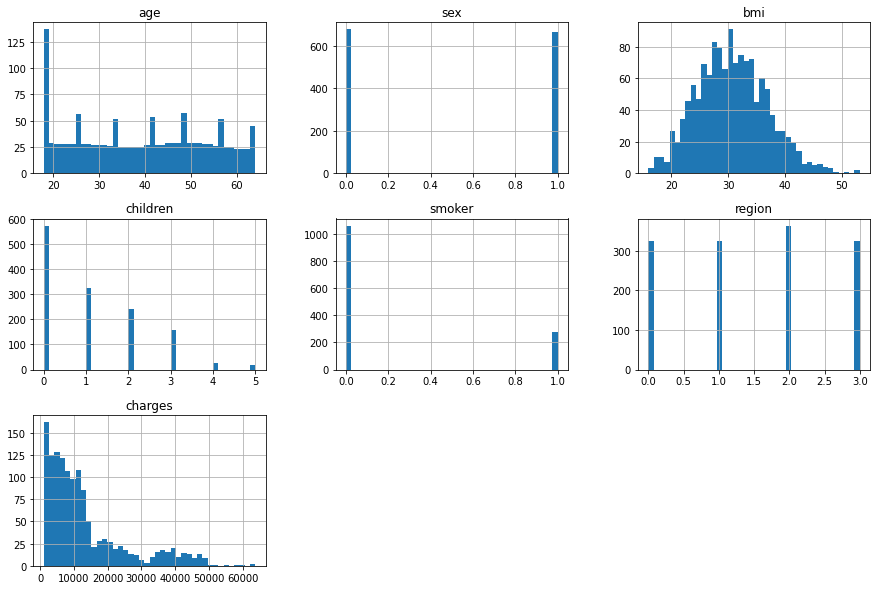

In [22]:
ins_en.hist(bins=40, figsize=(15, 10))
plt.show()

In [23]:
# Skewness and Kurtosis
for col in list(ins_en.columns):
    print(f'{col} : Skewness {ins_en[col].skew():.3f} and Kurtosis {ins_en[col].kurt():.3f}')

age : Skewness 0.056 and Kurtosis -1.245
sex : Skewness 0.021 and Kurtosis -2.003
bmi : Skewness 0.284 and Kurtosis -0.051
children : Skewness 0.938 and Kurtosis 0.202
smoker : Skewness 1.465 and Kurtosis 0.146
region : Skewness -0.038 and Kurtosis -1.329
charges : Skewness 1.516 and Kurtosis 1.606
